# Results
Analysis:
1. fMRI - two task conditions
2. fMRI - TR level LF HRV, HF HRV and BPM
3. PPI - two ROI with task

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting
import nibabel as nb

from pathlib import Path

/home/hw1012/.pyenv/versions/3.7.5/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Example of normal FSL GLM result

In [87]:
g_contrasts

['group_mean', 'control', 'patient', 'patient_wrt_control']

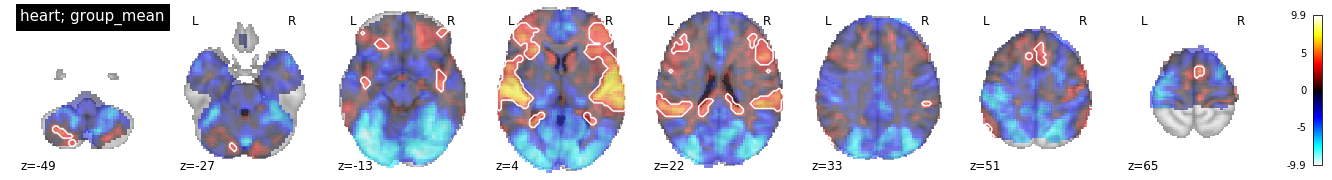

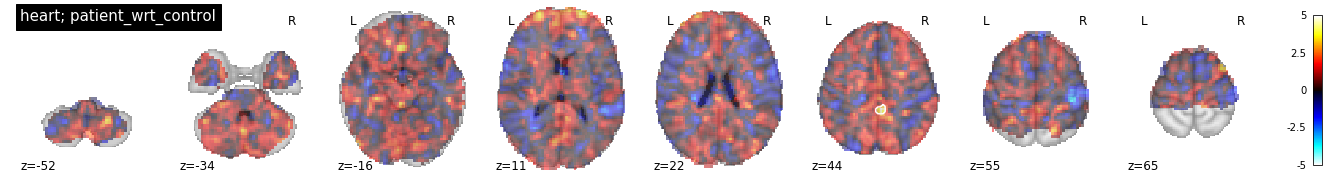

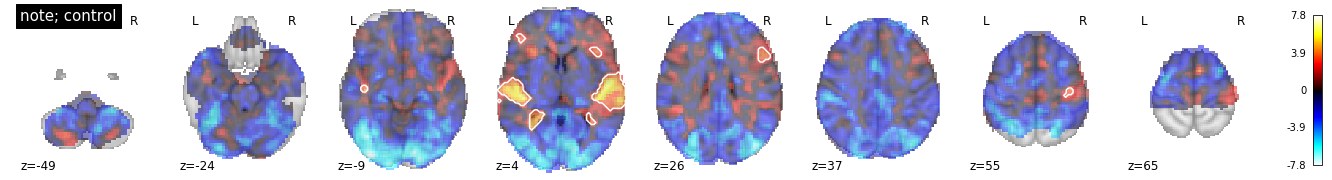

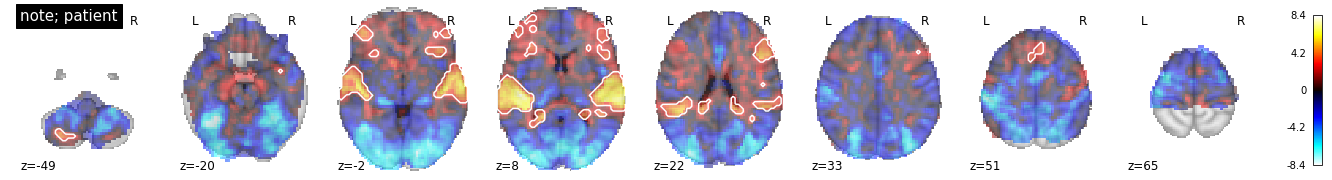

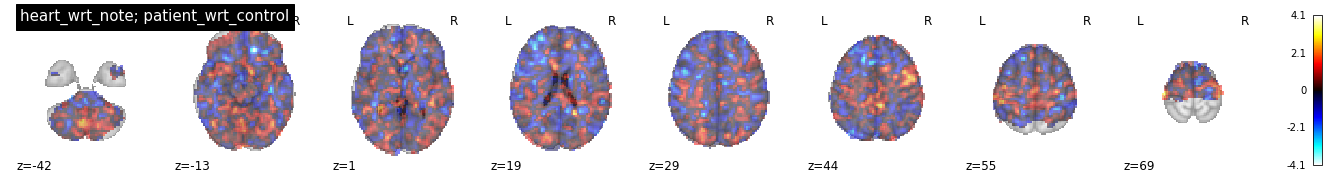

In [88]:
g_contrasts = []

with open("../scratch/FSL_task/group_level/FSL_flameo.gfeat/design.con") as f:
    for i in f.readlines():
        if "ContrastName" in i:
            g_contrasts.append("_".join(i.split()[1:]))

for j, c_name in enumerate(["heart", "note", "heart_wrt_note"]): 
    for i, g_name in enumerate(g_contrasts):
        zstat = f"./glm_niftis/FSL_task/FSL_flameo.gfeat/cope{j + 1}.feat/stats/zstat{i + 1}.nii.gz"
        cluster = f"./glm_niftis/FSL_task/FSL_flameo.gfeat/cope{j + 1}.feat/thresh_zstat{i + 1}.nii.gz"
        fig = plotting.plot_stat_map(zstat, title="; ".join([c_name, g_name]), 
                                     alpha=0.5, display_mode="z", cut_coords=8, draw_cross=False)
        fig.add_contours(cluster, levels=[(1 - p)], colors='w')

## FSL nonparametric test result (n = 1000)

### Task contrast

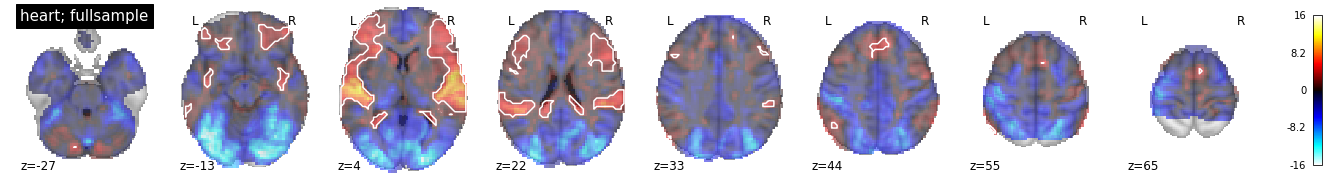

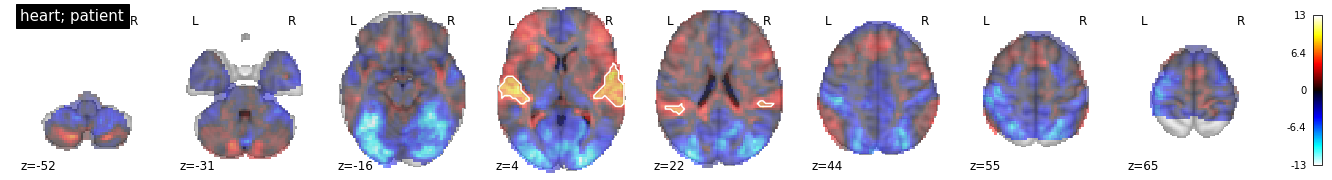

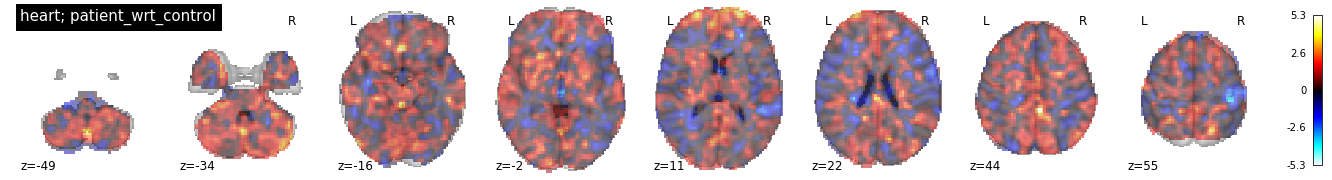

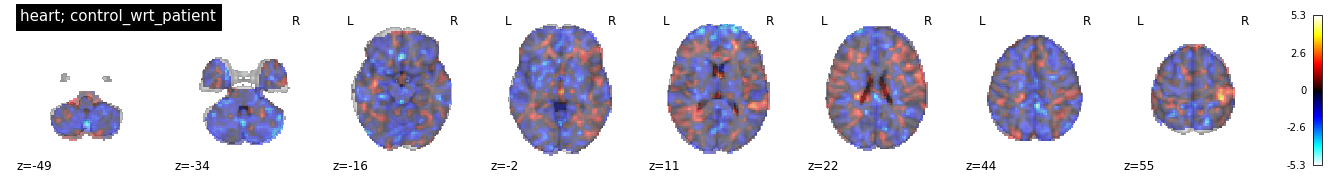

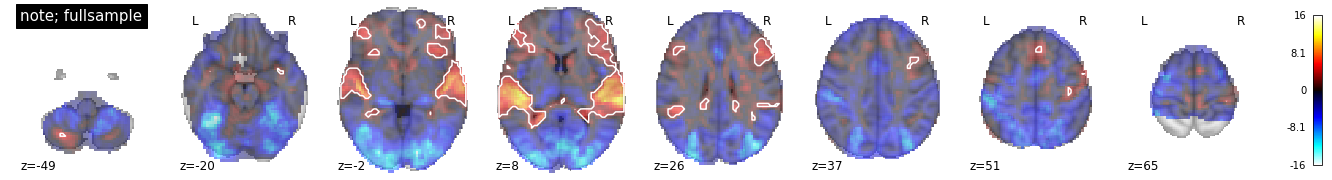

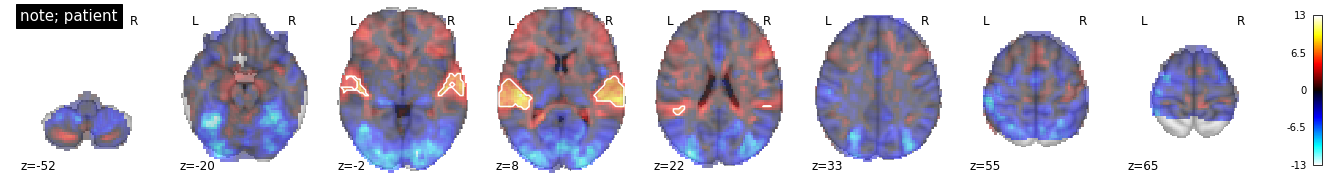

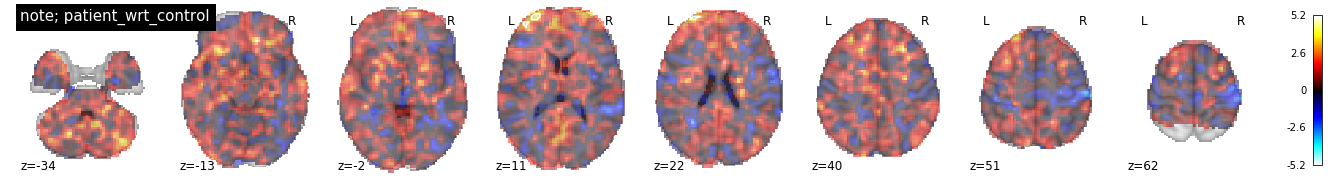

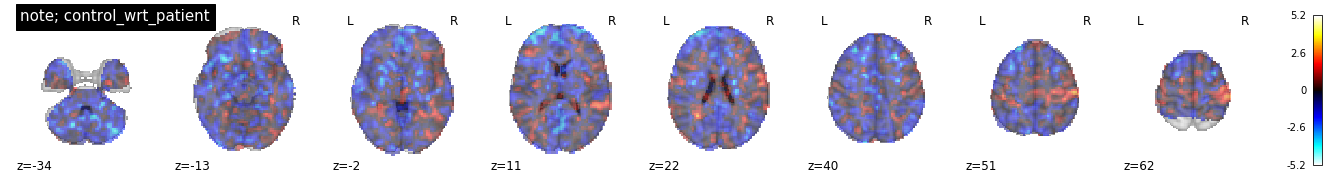

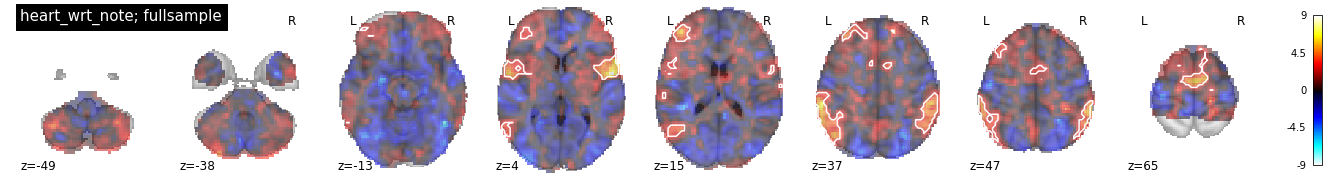

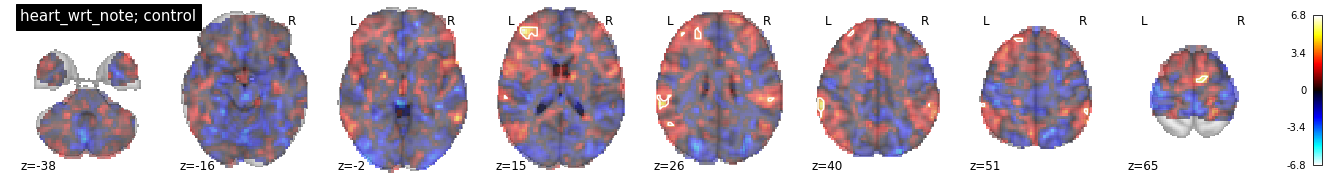

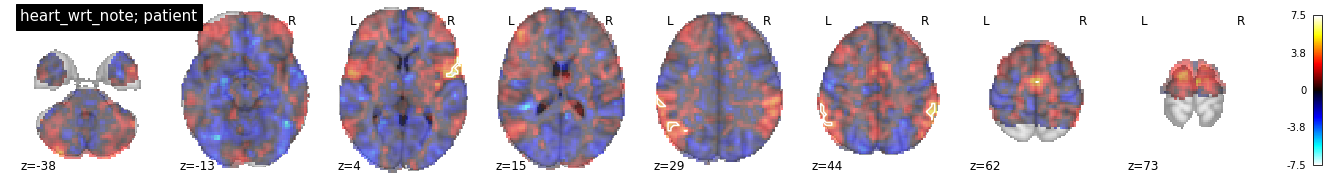

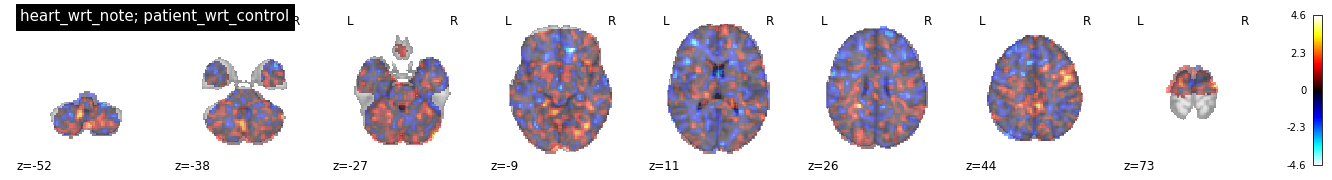

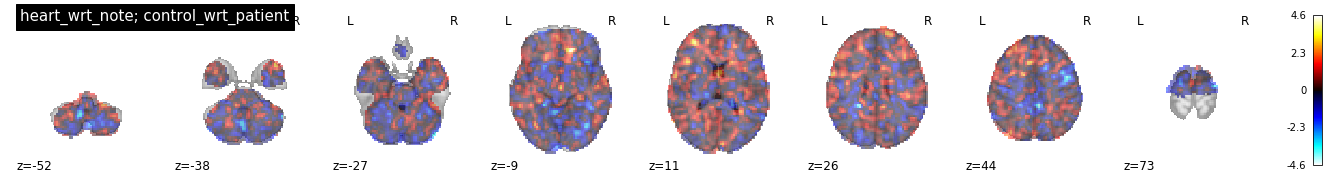

In [83]:
for c_name in ["heart", "note", "heart_wrt_note"]: 
    for g_name in ["fullsample", "control", "patient", "patient_wrt_control", "control_wrt_patient"]:
        tfce_cluster = f"./glm_niftis/FSL_task/contrast_{c_name}/{g_name}_randomise_tfce_corrp_tstat.nii.gz"
        tstat = f"./glm_niftis/FSL_task/contrast_{c_name}/{g_name}_randomise_tstat.nii.gz"
        
        tfce_nii = nb.load(tfce_cluster)
        mask = tfce_nii.get_fdata() > 0.95
        sig = tfce_nii.get_fdata().max()
        new = nb.Nifti1Image(tfce_nii.get_fdata() * mask, 
                             header=tfce_nii.header, 
                             affine=tfce_nii.affine)
        
        fig = plotting.plot_stat_map(tstat, title="; ".join([c_name, g_name]), 
                                     alpha=0.5, display_mode="z", cut_coords=8, draw_cross=False)
        fig.add_contours(new, levels=[(1 - p)], colors='w')

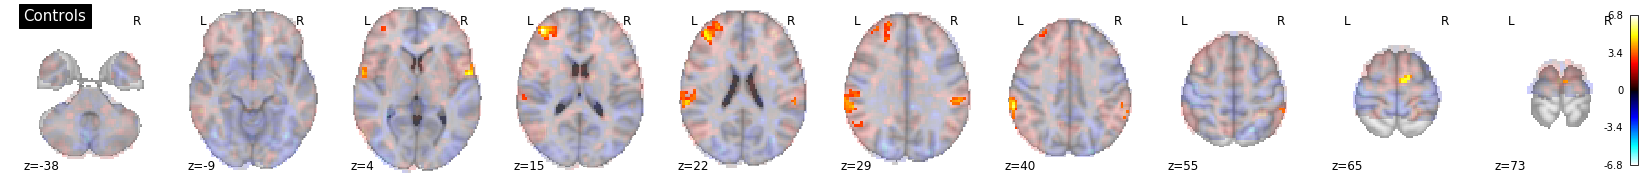

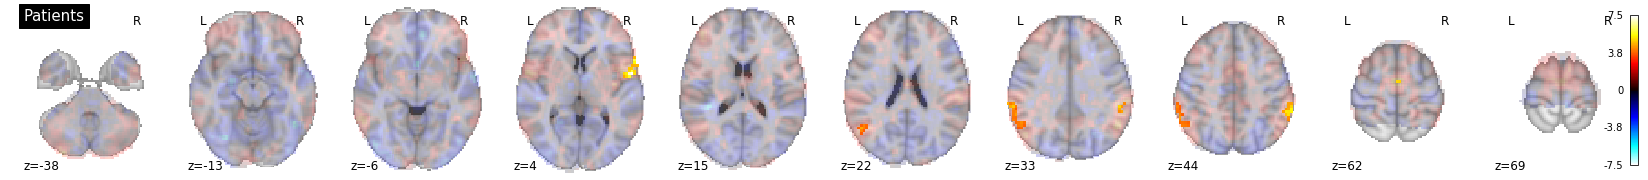

In [51]:
def task_map(c_name, g_name, title):
    p = 0.05
    tfce_cluster = f"./glm_niftis/FSL_task/contrast_{c_name}/{g_name}_randomise_tfce_corrp_tstat.nii.gz"
    tstat = f"./glm_niftis/FSL_task/contrast_{c_name}/{g_name}_randomise_tstat.nii.gz"

    tfce_nii = nb.load(tfce_cluster)
    mask = tfce_nii.get_fdata() > 0.95
    sig = tfce_nii.get_fdata().max()
    new = nb.Nifti1Image(tfce_nii.get_fdata() * mask, 
                         header=tfce_nii.header, 
                         affine=tfce_nii.affine)
    vmax = nb.load(tstat).get_fdata().max()
    sig_tstat = nb.Nifti1Image(nb.load(tstat).get_fdata() * mask, 
                               header=tfce_nii.header, 
                               affine=tfce_nii.affine)
    fig = plotting.plot_stat_map(tstat, title=title, vmax=vmax,  
                                 alpha=0.2, display_mode="z", cut_coords=10, draw_cross=False)
    fig.add_overlay(sig_tstat, vmin=-vmax, vmax=vmax, cmap="cold_hot")
    return fig

task_map("heart_wrt_note", "fullsample", "Full sample")
task_map("heart_wrt_note", "control", "Controls")
task_map("heart_wrt_note", "patient", "Patients")

### HRV : no significan cluster

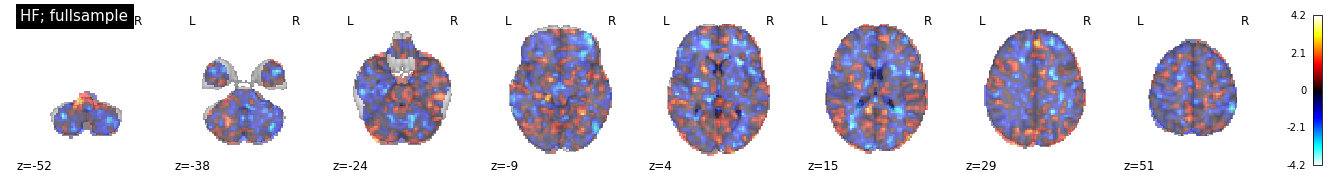

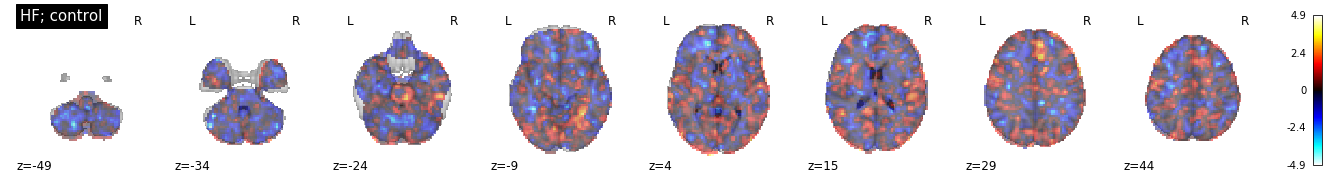

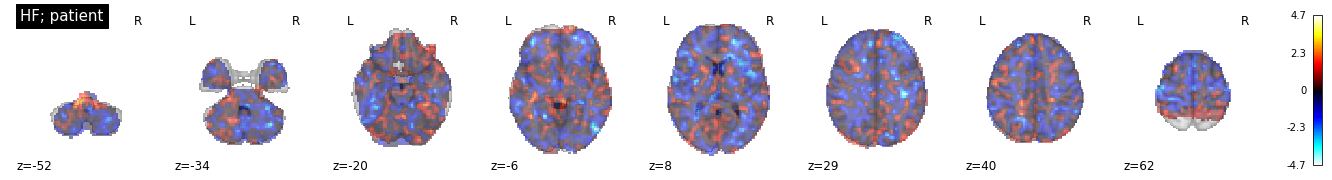

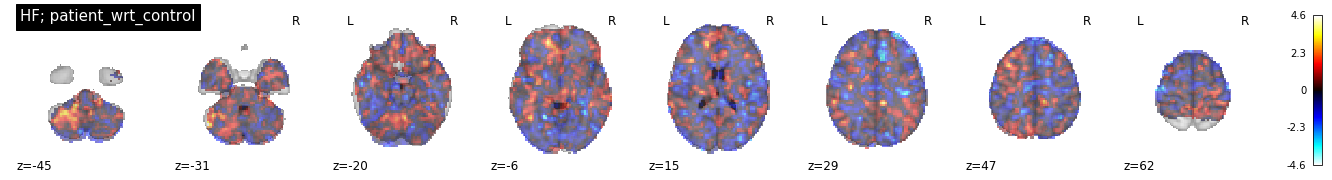

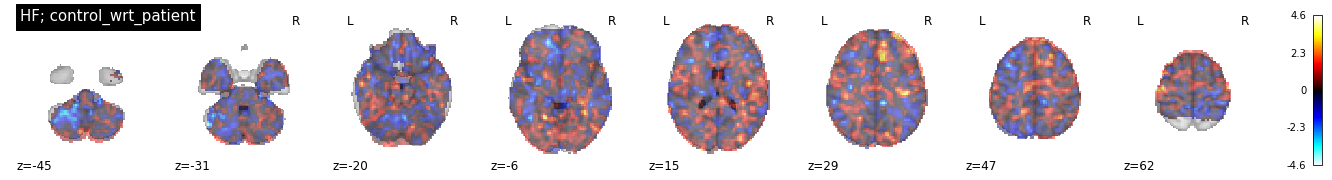

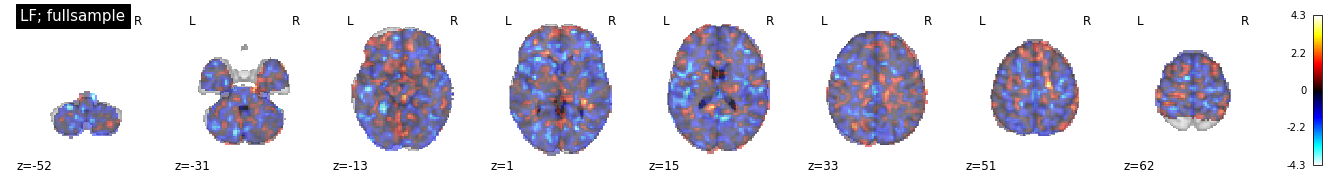

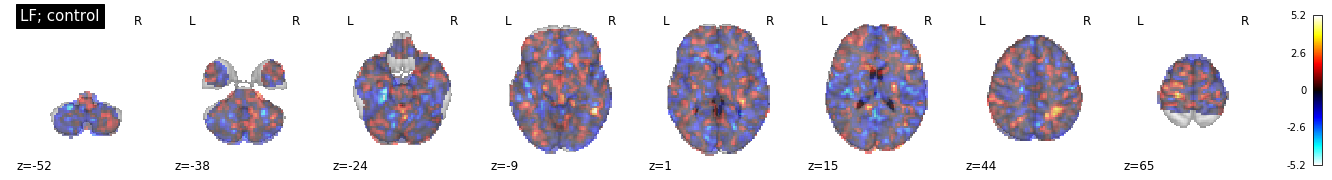

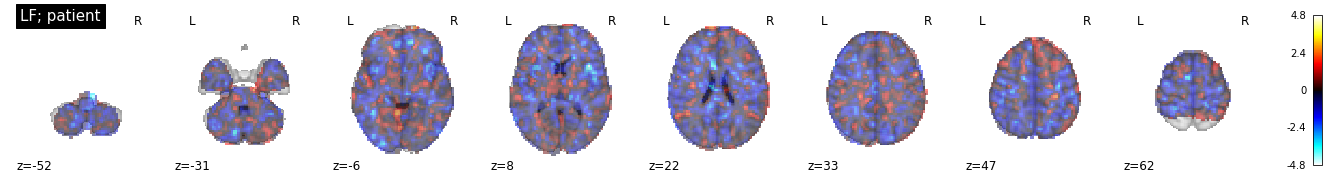

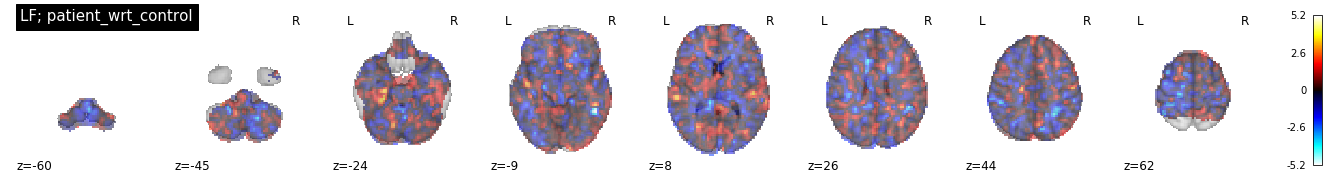

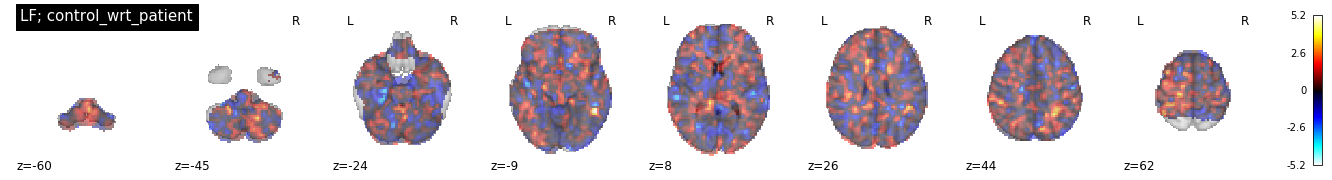

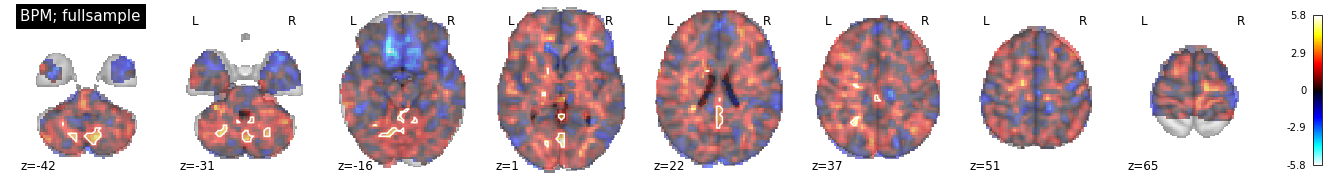

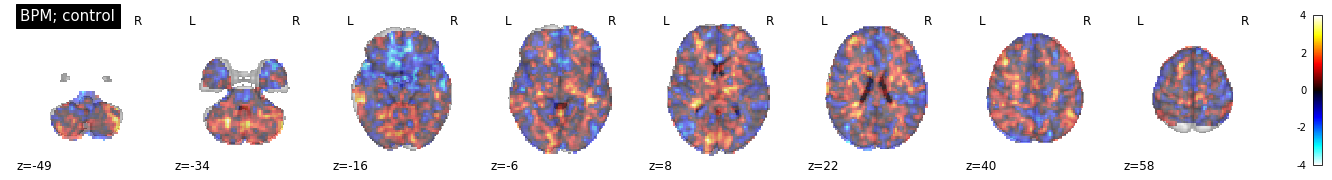

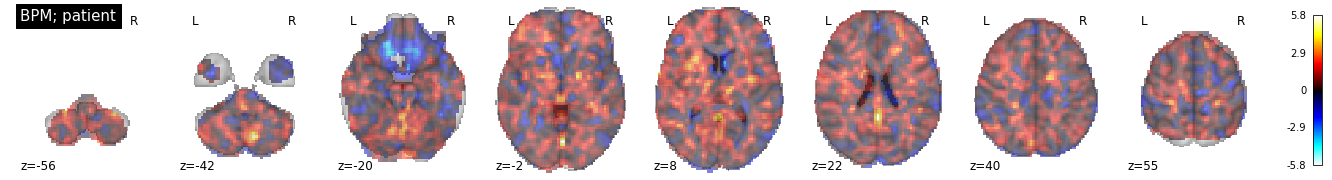

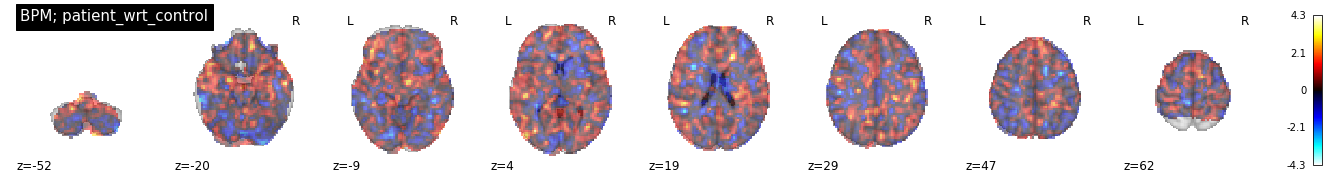

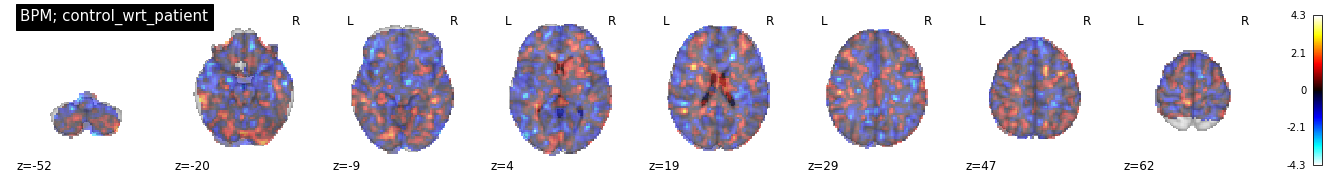

In [86]:
for c_name in ["HF", "LF", "BPM"]: 
    for g_name in ["fullsample", "control", "patient", "patient_wrt_control", "control_wrt_patient"]:
        tfce_cluster = f"./glm_niftis/FSL_HRV/contrast_{c_name}/{g_name}_randomise_tfce_corrp_tstat.nii.gz"
        tstat = f"./glm_niftis/FSL_HRV/contrast_{c_name}/{g_name}_randomise_tstat.nii.gz"
        tfce_nii = nb.load(tfce_cluster)
        mask = tfce_nii.get_fdata() > 0.95
        sig = tfce_nii.get_fdata().max()
        new = nb.Nifti1Image(tfce_nii.get_fdata() * mask, 
                             header=tfce_nii.header, 
                             affine=tfce_nii.affine)
        
        fig = plotting.plot_stat_map(tstat, title="; ".join([c_name, g_name]), 
                                     alpha=0.5, display_mode="z", cut_coords=8, draw_cross=False)
        fig.add_contours(new, levels=[(1 - p)], colors='w')

### PPI

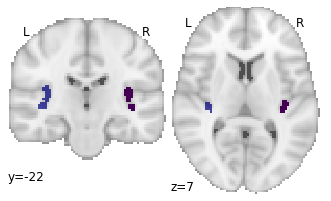

In [57]:
roi = plotting.plot_roi("../references/insular_masks/juelich_GM_insular_prob90_L.nii.gz",
                        display_mode="yz",
                        draw_cross=False)
roi.add_overlay("../references/insular_masks/juelich_GM_insular_prob90_R.nii.gz")

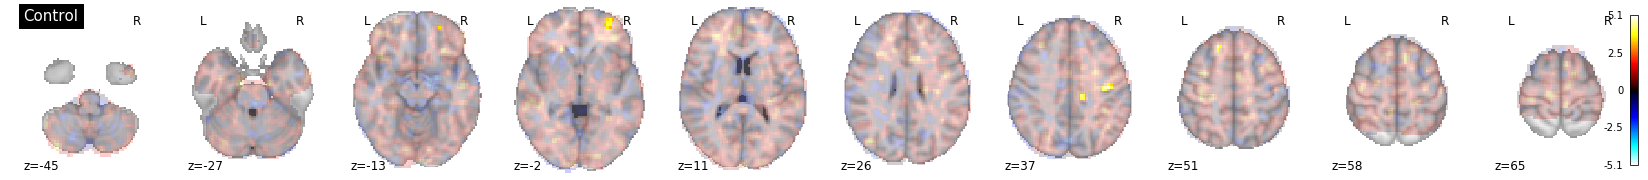

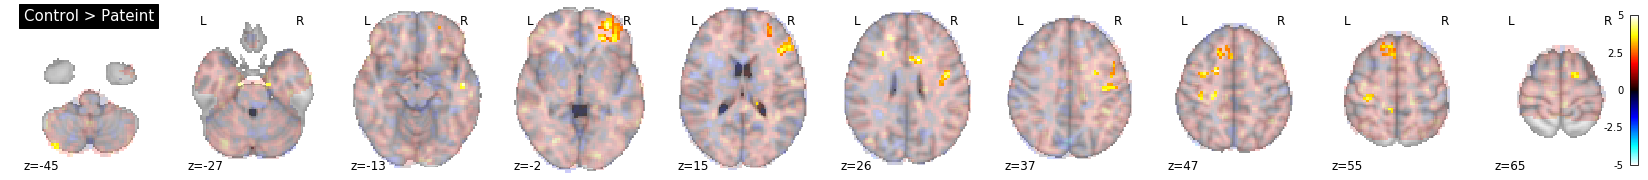

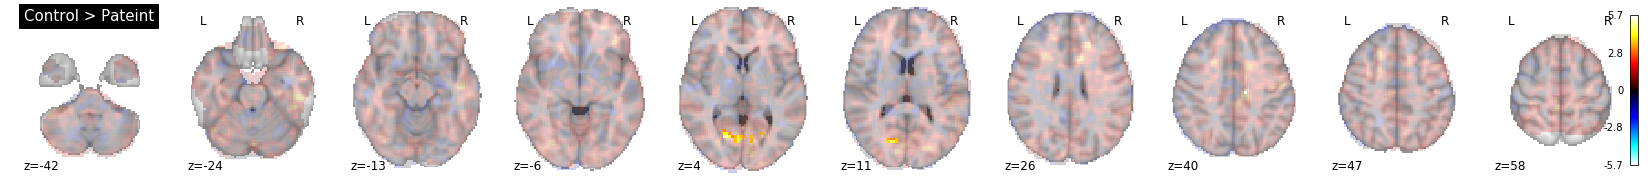

In [52]:
def sig_map(s_name, c_name, g_name, coord, title):
    p = 0.05
    tfce_cluster = f"./glm_niftis/FSL_PPI/{s_name}/contrast_{c_name}/{g_name}_tfce_corrp_tstat.nii.gz"
    tstat = f"./glm_niftis/FSL_PPI/{s_name}/contrast_{c_name}/{g_name}_tstat.nii.gz"
    tfce_nii = nb.load(tfce_cluster)
    mask = tfce_nii.get_fdata() > 0.95
    sig = tfce_nii.get_fdata().max()
    new = nb.Nifti1Image(tfce_nii.get_fdata() * mask, 
                         header=tfce_nii.header, 
                         affine=tfce_nii.affine)
    vmax = nb.load(tstat).get_fdata().max()
    sig_tstat = nb.Nifti1Image(nb.load(tstat).get_fdata() * mask, 
                               header=tfce_nii.header, 
                               affine=tfce_nii.affine)
    fig = plotting.plot_stat_map(tstat, title=title, vmax=vmax,  
                                 alpha=0.2, display_mode="z", cut_coords=10, draw_cross=False)
    fig.add_overlay(sig_tstat, vmin=-vmax, vmax=vmax, cmap="cold_hot")
    return fig

sig_map("insularL", "Heart_wrt_Note_int_insularL", 
        "control", (29, 53, -3), "Control")
sig_map("insularL", "Heart_wrt_Note_int_insularL", 
        "control_wrt_patient", (33, 49, -2), "Control > Pateint")
sig_map("insularL", "insularL_int_Heart", 
        "control_wrt_patient", (-12, 70, 6), "Control > Pateint")
sig_map("insularR", "Heart_wrt_Note_int_insularR", 
        "control_wrt_patient", (57, -6, 31), "Control > Pateint")

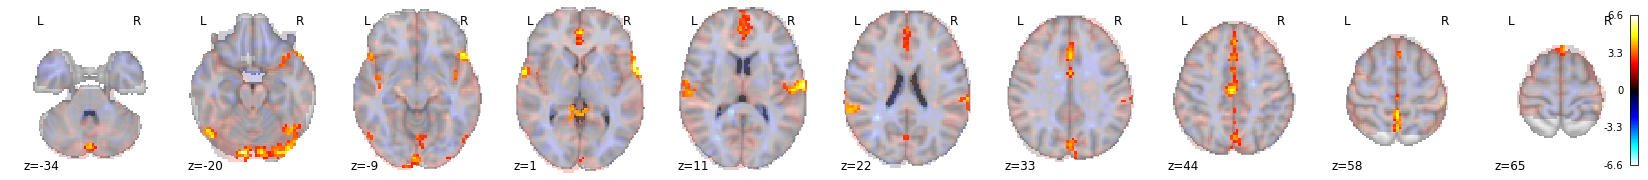

In [60]:
p = 0.05
tfce_cluster = f"../scratch/FSL_PPI-insularL/contrast_insularL/onesampleT_randomise/randomise_tfce_corrp_tstat1.nii.gz"
tstat = f"../scratch/FSL_PPI-insularL/contrast_insularL/onesampleT_randomise/randomise_tstat1.nii.gz"
tfce_nii = nb.load(tfce_cluster)
mask = tfce_nii.get_fdata() > 0.95
sig = tfce_nii.get_fdata().max()
new = nb.Nifti1Image(tfce_nii.get_fdata() * mask, 
                     header=tfce_nii.header, 
                     affine=tfce_nii.affine)
vmax = nb.load(tstat).get_fdata().max()
sig_tstat = nb.Nifti1Image(nb.load(tstat).get_fdata() * mask, 
                           header=tfce_nii.header, 
                           affine=tfce_nii.affine)
fig = plotting.plot_stat_map(tstat, vmax=vmax,  
                             alpha=0.2, display_mode="z", cut_coords=10, draw_cross=False)
fig.add_overlay(sig_tstat, vmin=-vmax, vmax=vmax, cmap="cold_hot")

In [65]:
p = 0.05
tfce_cluster = f"../scratch/FSL_PPI-insularR/contrast_insularR/onesampleT_randomise/randomise_tfce_corrp_tstat1.nii.gz"
tstat = f"../scratch/FSL_PPI-insularR/contrast_insularR/onesampleT_randomise/randomise_tstat1.nii.gz"
tfce_nii = nb.load(tfce_cluster)
mask = tfce_nii.get_fdata() > 0.95
sig = tfce_nii.get_fdata().max()
new = nb.Nifti1Image(tfce_nii.get_fdata() * mask, 
                     header=tfce_nii.header, 
                     affine=tfce_nii.affine)
vmax = nb.load(tstat).get_fdata().max()
sig_tstat = nb.Nifti1Image(nb.load(tstat).get_fdata() * mask, 
                           header=tfce_nii.header, 
                           affine=tfce_nii.affine)
fig = plotting.plot_stat_map(tstat, vmax=vmax,  
                             alpha=0.2, display_mode="z", cut_coords=10, draw_cross=False)
fig.add_overlay(sig_tstat, vmin=-vmax, vmax=vmax, cmap="cold_hot")

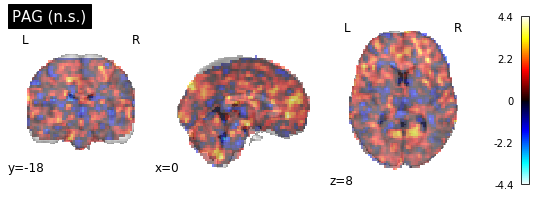

In [32]:
p = 0.05
tfce_cluster = f"../scratch/FSL_PPI-pag/group_level/FSL_randomise/contrast_pag/onesampleT_randomise/randomise_tfce_corrp_tstat1.nii.gz"
tstat = f"../scratch/FSL_PPI-pag/group_level/FSL_randomise/contrast_pag/onesampleT_randomise/randomise_tstat1.nii.gz"
tfce_nii = nb.load(tfce_cluster)
mask = tfce_nii.get_fdata() > 0.95
sig = tfce_nii.get_fdata().max()
new = nb.Nifti1Image(tfce_nii.get_fdata() * mask, 
                     header=tfce_nii.header, 
                     affine=tfce_nii.affine)
fig = plotting.plot_stat_map(tstat, title="PAG (n.s.)", 
                             alpha=0.5,draw_cross=False)
fig.add_contours(new, levels=[(1 - p)], colors='w')

In [21]:
p = 0.05
nii_dir = Path("./glm_niftis")
seed_dir = Path("../references/insular_masks")

for c in list(nii_dir.glob("FSL_PPI-insula*/*")):
    seed_name = str(c.parent).split("-")[-1]
    contrast_name = c.name
    path_roi = list(seed_dir.glob(f"probmap-gm-r*-{seed_name}.nii.gz"))[0]
    if "seed_int" in contrast_name:
        for g in ["fullsample", "control", "patient", "control_wrt_patients", "patient_wrt_control",]:
            tstat = f"{str(c)}/{g}_tstat.nii.gz"
            tfce = f"{str(c)}/{g}_tfce_corrp_tstat.nii.gz"
            title = ": ".join([seed_name, contrast_name, g])        

            tfce_nii = nb.load(tfce)
            mask = tfce_nii.get_fdata() > (1 - p)
            sig = tfce_nii.get_fdata().max()
            vmax = nb.load(tstat).get_fdata().max()
            data = nb.load(tstat).get_fdata() * mask
            if mask.sum() > 0: # only plot real values
                sig_tstat = nb.Nifti1Image(data, 
                                           header=tfce_nii.header, 
                                           affine=tfce_nii.affine)
                fig = plotting.plot_stat_map(sig_tstat, vmax=vmax+2, 
                                             display_mode="z", cut_coords=10, 
                                             draw_cross=False, title=title)
#                 fig.add_overlay(sig_tstat, vmin=-vmax, vmax=vmax, cmap="cold_hot")
                fig.savefig(f"glm_niftis/{seed_name}-{contrast_name}-{g}.png")
                fig.close()